In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [14]:
data_dir = "C:\\Users\\SRIHARIHARAKUMAR\\MSTAT-45\\4MSTAT\\Neural Networks and Deep Learning\\CNN_reallife\\Footwear_data"

In [15]:
img_size = (128, 128)
batch_size = 16

datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

Found 71 images belonging to 3 classes.


Found 16 images belonging to 3 classes.


In [16]:
print(train_data.class_indices)
print(val_data.class_indices)

{'Shoes': 0, 'Slipper': 1, 'Sneakers': 2}
{'Shoes': 0, 'Slipper': 1, 'Sneakers': 2}


In [17]:
num_classes = train_data.num_classes

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')   # ✅ matches dataset
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [18]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3023 - loss: 1.3651 - val_accuracy: 0.6250 - val_loss: 1.0808
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 731ms/step - accuracy: 0.3358 - loss: 1.0985 - val_accuracy: 0.3125 - val_loss: 1.0461
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 747ms/step - accuracy: 0.4535 - loss: 1.0140 - val_accuracy: 0.3750 - val_loss: 0.9469
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 890ms/step - accuracy: 0.6016 - loss: 0.8846 - val_accuracy: 0.6875 - val_loss: 0.7267
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 904ms/step - accuracy: 0.7147 - loss: 0.7218 - val_accuracy: 0.8125 - val_loss: 0.7412
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 852ms/step - accuracy: 0.5869 - loss: 0.8399 - val_accuracy: 0.6250 - val_loss: 0.6889
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 798ms/step - accuracy: 0.6487 - loss: 0.6405 - val_accuracy: 0.8750 - val_loss: 0.5777
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 896ms/step - accuracy: 0.8339 - loss: 0.5235 - val_accuracy: 0.6250 - val_loss: 0.

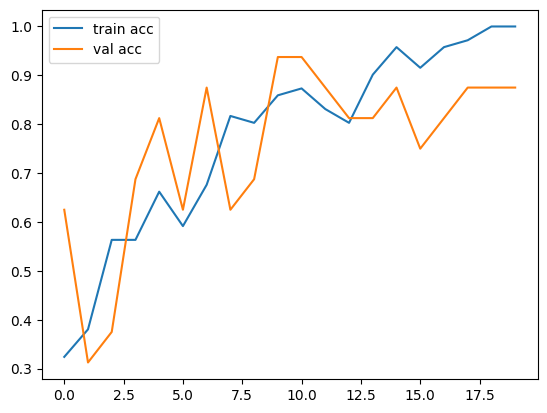

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step - accuracy: 0.9375 - loss: 1.1656
Validation Accuracy: 93.75%


In [19]:
# Accuracy & loss curves
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

# Evaluate on validation
loss, acc = model.evaluate(val_data)
print(f"Validation Accuracy: {acc*100:.2f}%")

In [20]:
img_path = "C:\\Users\\SRIHARIHARAKUMAR\\Downloads\\1715069056764-8.jpg"   # put the real filename

In [21]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load image
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)
class_labels = list(train_data.class_indices.keys())
print("Predicted Class:", class_labels[np.argmax(prediction)])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Predicted Class: Sneakers


In [22]:
model.save("shoe_classifier.h5")